##Waste Management Using CNN Model

In [12]:
# Install kagglehub
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)


100%|██████████| 427M/427M [00:08<00:00, 55.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [1]:
!pip install opencv.python

In [53]:
import os

# Replace with the actual path to the 'DATASET' folder
dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"

# List contents of TRAIN and TEST folders
O_path = os.path.join(dataset_path, "O")
R_path = os.path.join(dataset_path, "R")

print("Contents of O:", os.listdir(O_path))
print("Contents of R:", os.listdir(R_path))


Contents of O: ['O_10812.jpg', 'O_11244.jpg', 'O_7142.jpg', 'O_2186.jpg', 'O_10752.jpg', 'O_5525.jpg', 'O_6256.jpg', 'O_8754.jpg', 'O_6430.jpg', 'O_8676.jpg', 'O_987.jpg', 'O_5032.jpg', 'O_11604.jpg', 'O_6624.jpg', 'O_8661.jpg', 'O_9261.jpg', 'O_6242.jpg', 'O_3900.jpg', 'O_6148.jpg', 'O_5033.jpg', 'O_6337.jpg', 'O_11563.jpg', 'O_5656.jpg', 'O_3333.jpg', 'O_4569.jpg', 'O_9723.jpg', 'O_6850.jpg', 'O_3291.jpg', 'O_11968.jpg', 'O_528.jpg', 'O_5157.jpg', 'O_9867.jpg', 'O_819.jpg', 'O_4755.jpg', 'O_10947.jpg', 'O_9376.jpg', 'O_1828.jpg', 'O_10420.jpg', 'O_4448.jpg', 'O_12274.jpg', 'O_6699.jpg', 'O_11815.jpg', 'O_3096.jpg', 'O_12149.jpg', 'O_11141.jpg', 'O_10675.jpg', 'O_2910.jpg', 'O_12175.jpg', 'O_815.jpg', 'O_4860.jpg', 'O_1126.jpg', 'O_1751.jpg', 'O_8958.jpg', 'O_454.jpg', 'O_11645.jpg', 'O_8993.jpg', 'O_8902.jpg', 'O_11207.jpg', 'O_1088.jpg', 'O_7977.jpg', 'O_7831.jpg', 'O_3846.jpg', 'O_6737.jpg', 'O_5805.jpg', 'O_9038.jpg', 'O_11896.jpg', 'O_6183.jpg', 'O_12431.jpg', 'O_215.jpg', 'O_756

In [55]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [56]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [57]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [58]:
#visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array=cv2.imread(file)
    img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array=cv2.resize(img_array,(224,224))
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:10<00:00, 1181.16it/s]


In [59]:
data.shape

(22564, 2)

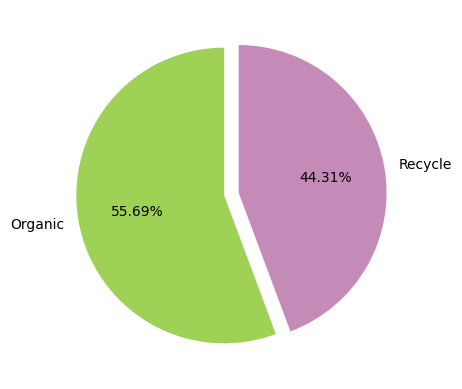

In [60]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recycle'], autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05,0.05])
plt.show()

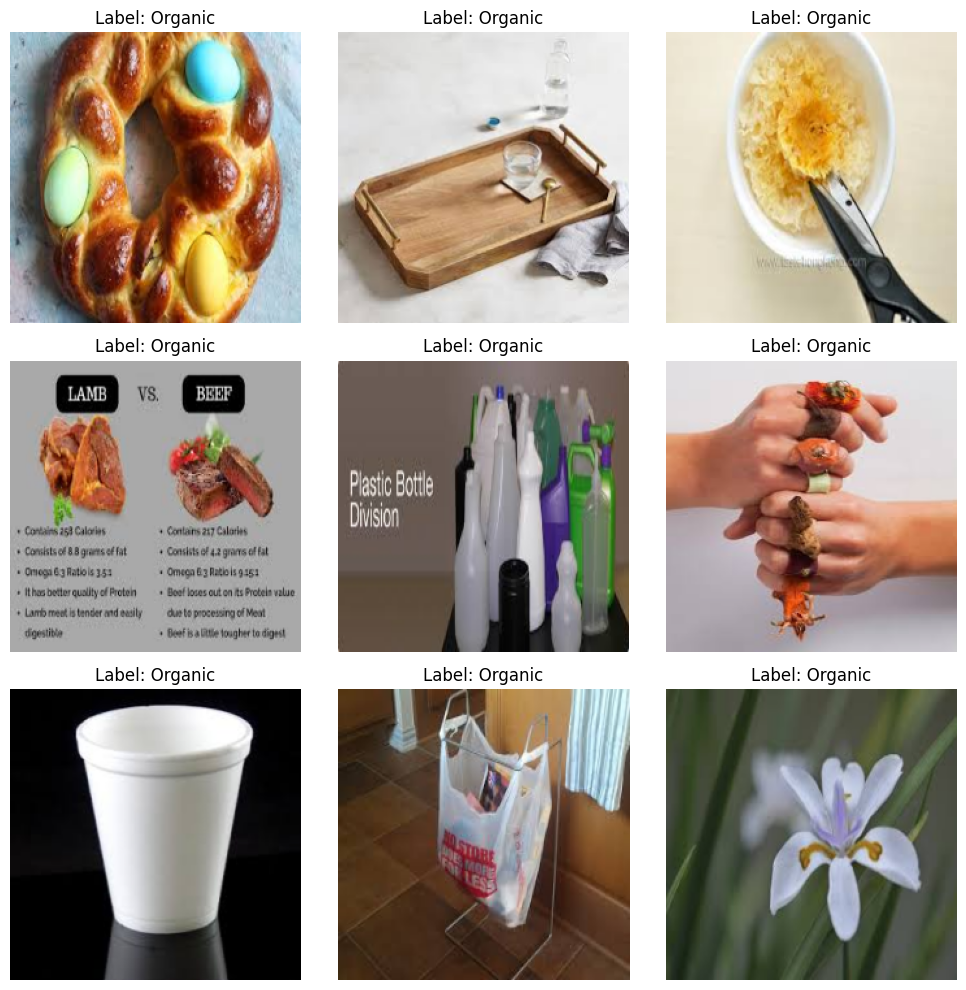

In [66]:
#displaying a 3x3 grid of images will be plotted, with each image displaying its corresponding label ("Organic" or "Recycle") based on the one-hot encoded values in y_data.
def plot_sample_images(x_data, y_data, categories, num_samples=9):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(len(x_data), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_data[idx])
        plt.title(f"Label: {categories[np.argmax(y_data[idx])]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Assuming y_data is one-hot encoded
plot_sample_images(x_data, y_data, categories = ['Organic', 'Recycle'])


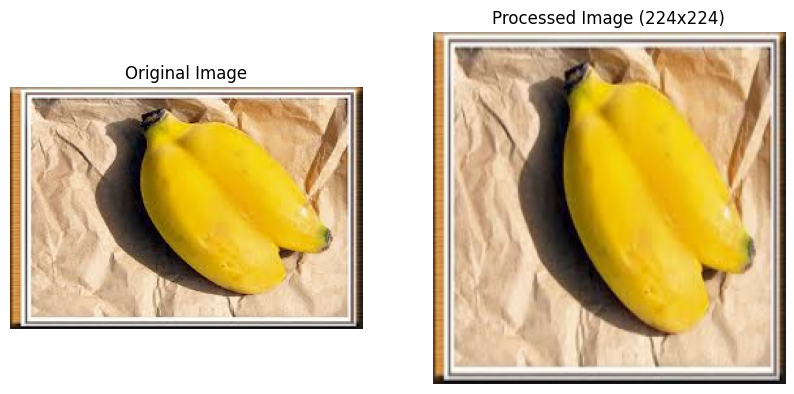

In [85]:
#Image Preprocessing Visualization Show before-and-after images during preprocessing (e.g., original image vs. resized/normalized image).
def visualize_preprocessing(image_path):
    img = cv2.imread(image_path)
    original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    processed_img = cv2.resize(original_img, (224, 224))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_img)
    plt.title("Processed Image (224x224)")
    plt.axis("off")
    plt.show()

# Test the function
sample_image = glob(f"{train_path}/O/*")[0]  # Replace with an actual file path
visualize_preprocessing(sample_image)


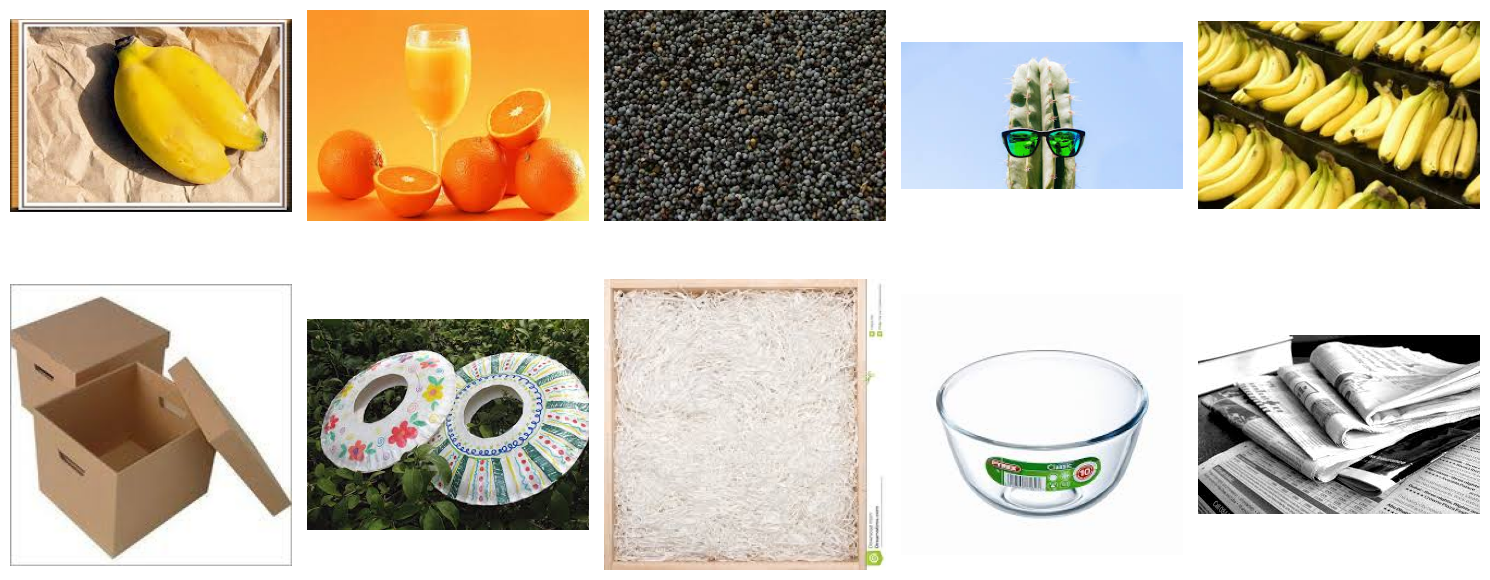

In [80]:
#Image Preprocessing Visualization Show before-and-after images during preprocessing (e.g., original image vs. resized/normalized image).

import matplotlib.pyplot as plt

def plot_sample_images(data_path, categories, num_images=5):
    plt.figure(figsize=(15, 7))
    for idx, category in enumerate(categories):
        images = glob(f"{data_path}/{category}/*")[:num_images]
        for i, image_path in enumerate(images):
            plt.subplot(len(categories), num_images, idx * num_images + i + 1)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.ylabel(category, fontsize=14)
    plt.tight_layout()
    plt.show()

categories = ['O', 'R']  # Replace with your actual category labels
plot_sample_images(train_path, categories)


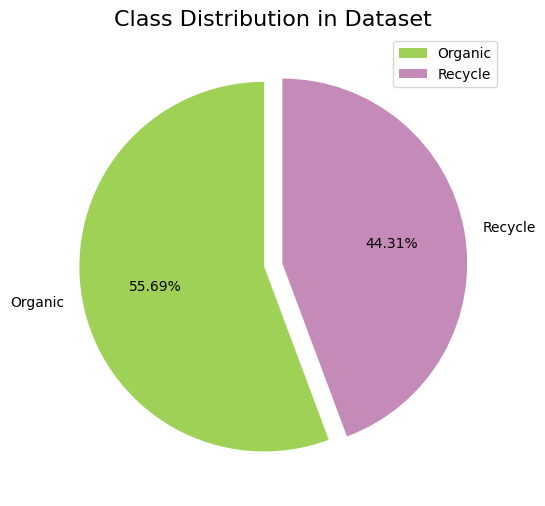

In [71]:
#Label Distribution Pie Chart Enhance the pie chart visualization with clearer labels and titles. Consider using a bar chart if the number of categories increases.

colors = ['#a0d157', '#c48bb8']
plt.figure(figsize=(6, 6))
plt.pie(
    data.label.value_counts(),
    labels=['Organic', 'Recycle'],
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.05, 0.05]
)
plt.title("Class Distribution in Dataset", fontsize=16)
plt.legend(['Organic', 'Recycle'], loc='upper right')
plt.show()


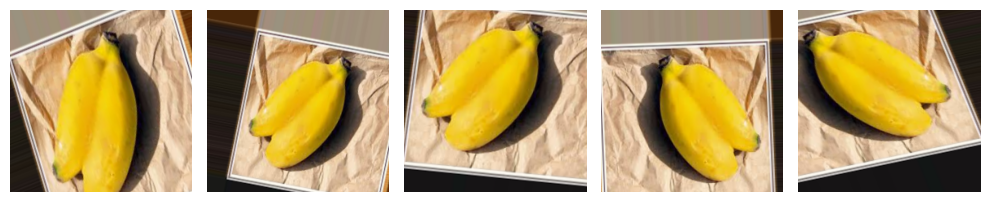

In [73]:
#Augmentation Visualization Show augmented versions of a single image to illustrate data augmentation techniques like rotation, flipping, and zooming.


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

sample_img = cv2.imread(sample_image)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_img = cv2.resize(sample_img, (224, 224))
sample_img = np.expand_dims(sample_img, axis=0)

plt.figure(figsize=(10, 5))
for i, augmented_img in enumerate(datagen.flow(sample_img, batch_size=1)):
    if i == 5:  # Show 5 augmented images
        break
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_img[0].astype('uint8'))
    plt.axis('off')
plt.tight_layout()
plt.show()
